في هذا النشاط سنتعمق في استكشاف تصنيفات بياناتنا أكثر من خلال النظر في تصنيف أو صنف واحد في كل مرة. إذ سنلقي نظرة على المقالات الصحفية غير أنه بدلا من استعراضها جميعا مرة واحدة، سننظر فيها سنة بعد أخرى في كل مرة.

نبدأ الآن بتحميل بيئة العمل.


In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join("..", "data")
print("Done!")

Done!


سنحمّل بياناتنا الآن، وهذه المرة ستكون المقالات الافتتاحية من صحيفة *نيويورك تايمز*.

In [2]:
file = os.path.join(ai.data_dir, "economic.nyt.1931-2016.gz")
df = pd.read_csv(file, nrows = 1000000)
print(df)

        Year  Month                                               Text
0       1931      5  PHILADELPHIA, April. 30.-- Braced for what the...
1       1931      5  BUENOS AIRES, April 30.--Argentina, winner in ...
2       1931      5  WASHINGTON, April 30.--Music of a kind hithert...
3       1931      5  WASHINGTON, April 30.--Two skirmishes between ...
4       1931      5  ROCHESTER, N.Y., April 30.-- Three Federal ban...
...      ...    ...                                                ...
999995  1943     11  Fearful lest the shortage of whiskies and the ...
999996  1943     11  "An exhibition called ""Prints of Our Allies""...
999997  1943     11  "Not more than 300 men in the stock market com...
999998  1943     11  The early operational bulletin, as broadcast f...
999999  1943     11  LONDON, Nov. 12 (U.P.) -- In Serbia, near Uzic...

[1000000 rows x 3 columns]


إذن هنا يظهر كيفية النظر في تصنيف واحد فقط في كل مرة باستعمال: *groupby*.

In [3]:
for year, year_df in df.groupby("Year"):
        print(year, ": ", len(year_df))
        
print("Done!")

1931 :  46597
1932 :  67283
1933 :  66843
1934 :  77682
1935 :  78552
1936 :  80509
1937 :  131577
1938 :  122919
1939 :  66237
1940 :  64928
1941 :  69393
1942 :  70895
1943 :  56585
Done!


يوضح لنا هذا الكود البرمجي عدد المقالات الصحفية التي تتضمنها المدونة في كل سنة (حملنا فقط الجزء الأول منها، ولذا هذا مجرد جزء منها وليست كلها). وتلك واحدة من الطرق التي يمكن أن تُجرى فيها عملية التكرار iterating على البيانات. إلا أننا بدلا من إجراء عملية التكرار على المقالات فرادى أجريناها على تصنيفات المقالات.

ولنحول ذلك الآن إلى رسم بياني.

In [4]:
years = []
for year, year_df in df.groupby("Year"):
        years.append([year, len(year_df)])

years = pd.DataFrame(years, columns = ["Year", "N."])
years.set_index("Year", drop = True, inplace = True)
print(years)
print("Done!")

          N.
Year        
1931   46597
1932   67283
1933   66843
1934   77682
1935   78552
1936   80509
1937  131577
1938  122919
1939   66237
1940   64928
1941   69393
1942   70895
1943   56585
Done!


<AxesSubplot:ylabel='Year'>

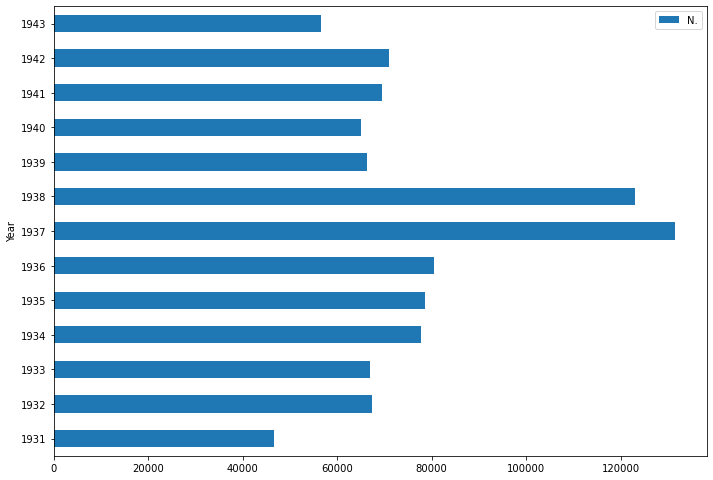

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

years.plot(kind = "barh")

هذا كل شيء في هذا النشاط! لقد تعلمنا اليوم كيفية إجراء عملية التكرار على مجموعة بيانات حسب تصنيفاتها.
والآن حان دورك لاستعمال مساحة الكود البرمجي أدناه مع الأمثلة أعلاه لإجراء نفس التحليل على ملف مختلف:

    "economic.congress.1931-2016.gz"